In [33]:
import time
print(time.ctime(time.time()))

Sun Dec  7 17:19:58 2025


# Advent of Code Day 7

Puzzle text available at:
https://adventofcode.com/2025/day/7

In [34]:
import os
import numpy as np
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

In [35]:
# Day of calendar
day = 7

In [36]:
# Set path to input
input_dir = Path(os.path.abspath('')).parent

In [37]:
filepath = os.path.join(input_dir,'inputs','input_day%02d.txt' %(day))
with open(filepath, 'r') as f:
    problem_input = []
    for line in f:
        problem_input.append(list(line.strip()))
grid = np.array(problem_input)
print(grid[:10,:])

[['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ...
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']]


## Part 1

Analyze your manifold diagram

In [38]:
# Var init
grid_manifold = grid.copy()
grid_plot = np.stack([grid] * (grid.shape[0] - 1), axis=2)

# Loop through every row and col
for i in range(grid.shape[0]-1):
    for j in range(grid.shape[1]):
        # Emission start
        if i == 0:
            if grid[i,j] == 'S':
                grid_manifold[i+1,j] = '|'

        # When we find a beam, check if we have a splitter below
        # if so, split the beam
        if grid_manifold[i,j] == '|':
            if grid_manifold[i+1,j] == '^':
                grid_manifold[i+1,j-1] = '|'
                grid_manifold[i+1,j+1] = '|'
            else: # if not, just propagate the beam downward
                grid_manifold[i+1,j] = '|'

    grid_plot[:,:,i] = grid_manifold

In [39]:
# Give numeric values for coloring
numeric_grid = np.zeros_like(grid_plot, dtype=int)
numeric_grid[grid_plot == '.'] = 0
numeric_grid[grid_plot == '^'] = 1
numeric_grid[grid_plot == '|'] = 2
numeric_grid[grid_plot == 'S'] = 3

xg = np.arange(grid_plot.shape[0])
yg = np.arange(grid_plot.shape[1])

# Plot

## Result

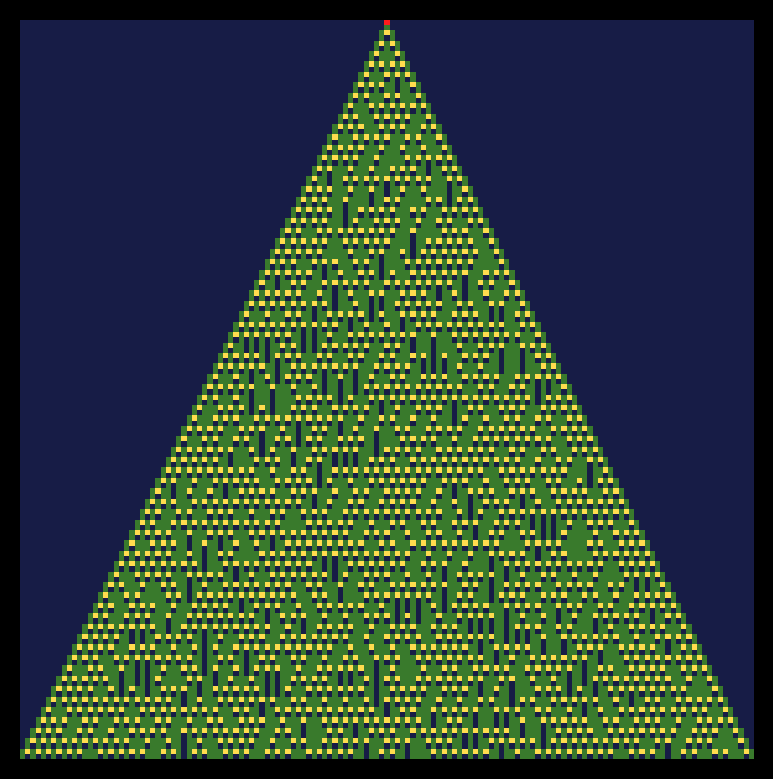

In [48]:
fig, ax = plt.subplots(dpi=200)
fig.set_facecolor('k')
colors = ['#171C46', '#FFDC4F', '#397A2C', '#FF1C1C']
cmap = plt.matplotlib.colors.ListedColormap(colors)

frames = []

ax.clear()
ax.set_facecolor('k')

mesh = ax.pcolormesh(yg, xg, np.flip(numeric_grid[:,:,-1], axis=0), cmap=cmap, 
                        linewidth=0.5, vmin=0, vmax=3)
ax.set_aspect('equal')
ax.axis('off')

fig.savefig('aoc2025_day07_part1.png',bbox_inches='tight')

## Animation

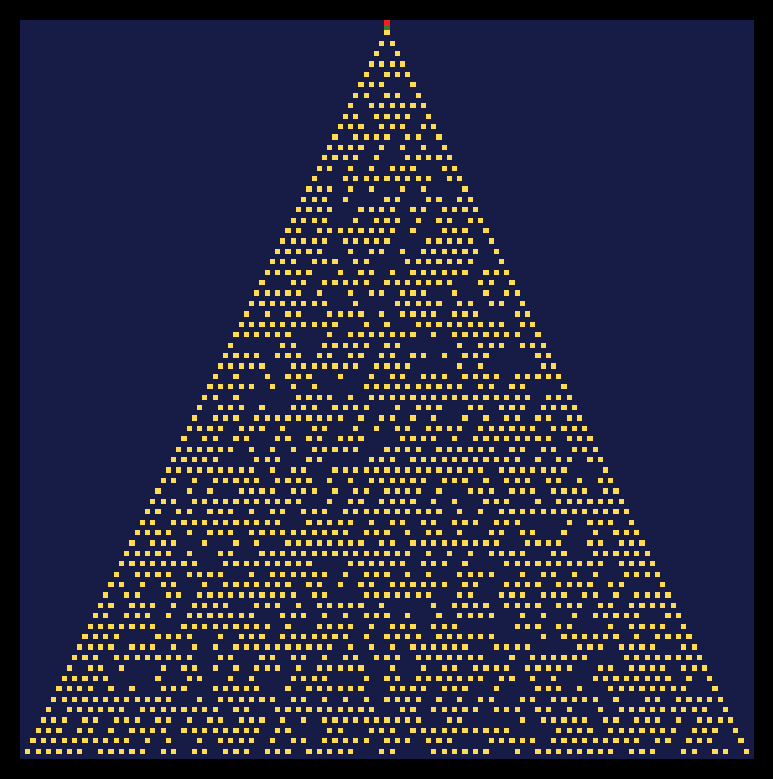

In [44]:
fig, ax = plt.subplots(dpi=200)
fig.set_facecolor('k')
colors = ['#171C46', '#FFDC4F', '#397A2C', '#FF1C1C']
cmap = plt.matplotlib.colors.ListedColormap(colors)

frames = []

for i in range(grid_plot.shape[2]):
    ax.clear()
    ax.set_facecolor('k')

    mesh = ax.pcolormesh(yg, xg, np.flip(numeric_grid[:,:,i], axis=0), cmap=cmap, 
                            linewidth=0.5, vmin=0, vmax=3)
    ax.set_aspect('equal')
    ax.axis('off')

    # Convert plot to image
    buf = io.BytesIO()
    plt.savefig(buf, format='png', facecolor='k', bbox_inches='tight')
    buf.seek(0)
    frames.append(Image.open(buf).copy())
    buf.close()

plt.close()

# Save as GIF
fname = 'aoc2025_day07_part1.gif'
frames[0].save(fname, 
               save_all=True, 
               append_images=frames[1:], 
               duration=20,  # milliseconds per frame
               loop=0)  # 0 = loop forever

# Display in Jupyter
from IPython.display import Image as IPImage, display
display(IPImage(filename=fname))